In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
import scipy as scipy
from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
df_mult = pd.read_csv('../data/mult_gauss_fit/io_results_june_8.csv')
df_sing = pd.read_csv('../data/single_gauss_fit/io_results_june_8.csv')

Let's pick and choose which values we want.

In [3]:
df_wv_1 = df_mult['int_wv_1']
df_wv_2 = df_mult['int_wv_2']
df_brightness_1 = df_mult['brightness_1']
df_fix = pd.DataFrame()
df_final = pd.DataFrame()

In [4]:
df_mult

,brightness_1,brightness_2,gaussian_width_1,gaussian_width_2,gaussian_width_unc_1,gaussian_width_unc_2,int_wv_1,int_wv_2,obs_line_center_1,obs_line_center_2,obs_line_center_unc_1,obs_line_center_unc_2
0,1.700053e-17,1.462852e-12,0.154518,9.836438,4.305899e-02,7.572404e+01,1208.8500,1211.2120,1208.854071,1238.314057,4.025414e-02,4.274975e+02
1,4.912578e-08,1.162025e-08,272.700012,-64.505728,inf,inf,1211.2120,1211.3800,8461.790576,6034.890030,inf,inf
2,4.389359e-14,5.890743e-12,-1.132118,5.762231,inf,inf,1211.3800,1212.7950,1200.726579,1231.697570,inf,inf
3,3.401087e-13,1.285437e-09,0.373172,-21.875299,8.363489e-03,9.644491e+02,1212.7950,1218.5950,1215.493872,1282.851832,7.510647e-03,5.883498e+03
4,3.771860e-15,1.447664e-15,1.273736,1.903410,3.188174e-01,4.708771e-01,1218.5950,1224.4240,1216.874794,1223.416501,6.454647e-01,3.374139e-01
5,-2.485466e-07,2.531851e-07,1391.315782,1417.251101,inf,inf,1224.4240,1224.4790,50231.444764,-51703.056793,inf,inf
6,-1.900026e-07,1.980120e-07,1059.874306,1104.528067,inf,inf,1224.4790,1224.5440,32112.027118,-34312.269915,inf,inf
7,5.549493e-17,2.272767e-16,0.236641,0.521849,3.243669e-02,5.778567e-02,1224.5440,1227.0890,1224.491508,1227.023230,3.243641e-02,5.728564e-02
8,2.347493e-16,3.355998e-16,0.532426,0.389664,6.111801e-02,1.909158e-02,1227.0890,1233.9220,1227.018290,1234.112549,5.968030e-02,1.901770e-02
9,3.419263e-16,1.128653e-18,0.394411,0.035693,1.716768e-02,1.280469e-02,1233.9220,1241.9050,1234.113622,1241.955875,1.716718e-02,1.280469e-02


Let's remove the indecies where the different between the 

In [5]:
for index in (range(0, len(df_mult))):
    if df_wv_2[index] - df_wv_1[index] > 0.2:
        df_fix = df_fix.append(df_mult.loc[index], ignore_index=True)

In [6]:
df_fix

,brightness_1,brightness_2,gaussian_width_1,gaussian_width_2,gaussian_width_unc_1,gaussian_width_unc_2,int_wv_1,int_wv_2,obs_line_center_1,obs_line_center_2,obs_line_center_unc_1,obs_line_center_unc_2
0,1.700053e-17,1.462852e-12,0.154518,9.836438,4.305899e-02,7.572404e+01,1208.8500,1211.2120,1208.854071,1238.314057,4.025414e-02,4.274975e+02
1,4.389359e-14,5.890743e-12,-1.132118,5.762231,inf,inf,1211.3800,1212.7950,1200.726579,1231.697570,inf,inf
2,3.401087e-13,1.285437e-09,0.373172,-21.875299,8.363489e-03,9.644491e+02,1212.7950,1218.5950,1215.493872,1282.851832,7.510647e-03,5.883498e+03
3,3.771860e-15,1.447664e-15,1.273736,1.903410,3.188174e-01,4.708771e-01,1218.5950,1224.4240,1216.874794,1223.416501,6.454647e-01,3.374139e-01
4,5.549493e-17,2.272767e-16,0.236641,0.521849,3.243669e-02,5.778567e-02,1224.5440,1227.0890,1224.491508,1227.023230,3.243641e-02,5.728564e-02
5,2.347493e-16,3.355998e-16,0.532426,0.389664,6.111801e-02,1.909158e-02,1227.0890,1233.9220,1227.018290,1234.112549,5.968030e-02,1.901770e-02
6,3.419263e-16,1.128653e-18,0.394411,0.035693,1.716768e-02,1.280469e-02,1233.9220,1241.9050,1234.113622,1241.955875,1.716718e-02,1.280469e-02
7,1.128465e-18,1.434282e-16,0.035689,0.318754,1.129309e-02,2.119370e-02,1241.9050,1247.1600,1241.955876,1247.222249,1.129309e-02,2.119339e-02
8,1.436696e-16,1.759431e-11,0.319108,-17.860911,inf,inf,1247.1600,1248.0450,1247.222411,1419.520403,inf,inf
9,1.418801e-16,1.687398e-15,0.317126,0.315558,7.960034e-02,5.184365e-03,1248.0450,1250.8140,1247.224397,1250.620238,7.129301e-02,5.184365e-03


In [9]:
for index in (range(0, len(df_fix))):
    if df_brightness_1[index] > 0:
        df_final = df_final.append(df_fix.loc[index], ignore_index=True)

In [10]:
df_final

,brightness_1,brightness_2,gaussian_width_1,gaussian_width_2,gaussian_width_unc_1,gaussian_width_unc_2,int_wv_1,int_wv_2,obs_line_center_1,obs_line_center_2,obs_line_center_unc_1,obs_line_center_unc_2
0,1.700053e-17,1.462852e-12,0.154518,9.836438,4.305899e-02,7.572404e+01,1208.8500,1211.212,1208.854071,1238.314057,4.025414e-02,4.274975e+02
1,4.389359e-14,5.890743e-12,-1.132118,5.762231,inf,inf,1211.3800,1212.795,1200.726579,1231.697570,inf,inf
2,3.401087e-13,1.285437e-09,0.373172,-21.875299,8.363489e-03,9.644491e+02,1212.7950,1218.595,1215.493872,1282.851832,7.510647e-03,5.883498e+03
3,3.771860e-15,1.447664e-15,1.273736,1.903410,3.188174e-01,4.708771e-01,1218.5950,1224.424,1216.874794,1223.416501,6.454647e-01,3.374139e-01
4,5.549493e-17,2.272767e-16,0.236641,0.521849,3.243669e-02,5.778567e-02,1224.5440,1227.089,1224.491508,1227.023230,3.243641e-02,5.728564e-02
5,1.128465e-18,1.434282e-16,0.035689,0.318754,1.129309e-02,2.119370e-02,1241.9050,1247.160,1241.955876,1247.222249,1.129309e-02,2.119339e-02
6,1.436696e-16,1.759431e-11,0.319108,-17.860911,inf,inf,1247.1600,1248.045,1247.222411,1419.520403,inf,inf
7,1.418801e-16,1.687398e-15,0.317126,0.315558,7.960034e-02,5.184365e-03,1248.0450,1250.814,1247.224397,1250.620238,7.129301e-02,5.184365e-03
8,1.687691e-15,3.978206e-15,0.315593,0.339221,8.603726e-03,4.542188e-03,1250.8140,1253.297,1250.620231,1253.837618,8.602552e-03,4.409573e-03
9,5.326448e-15,-6.477548e-16,0.380349,0.278344,3.954761e-02,8.979161e-02,1253.3250,1256.093,1253.768088,1253.339847,1.117126e-01,1.268912e-01


In [11]:
df_brightness = df_final[['brightness_1','int_wv_1','obs_line_center_1']]

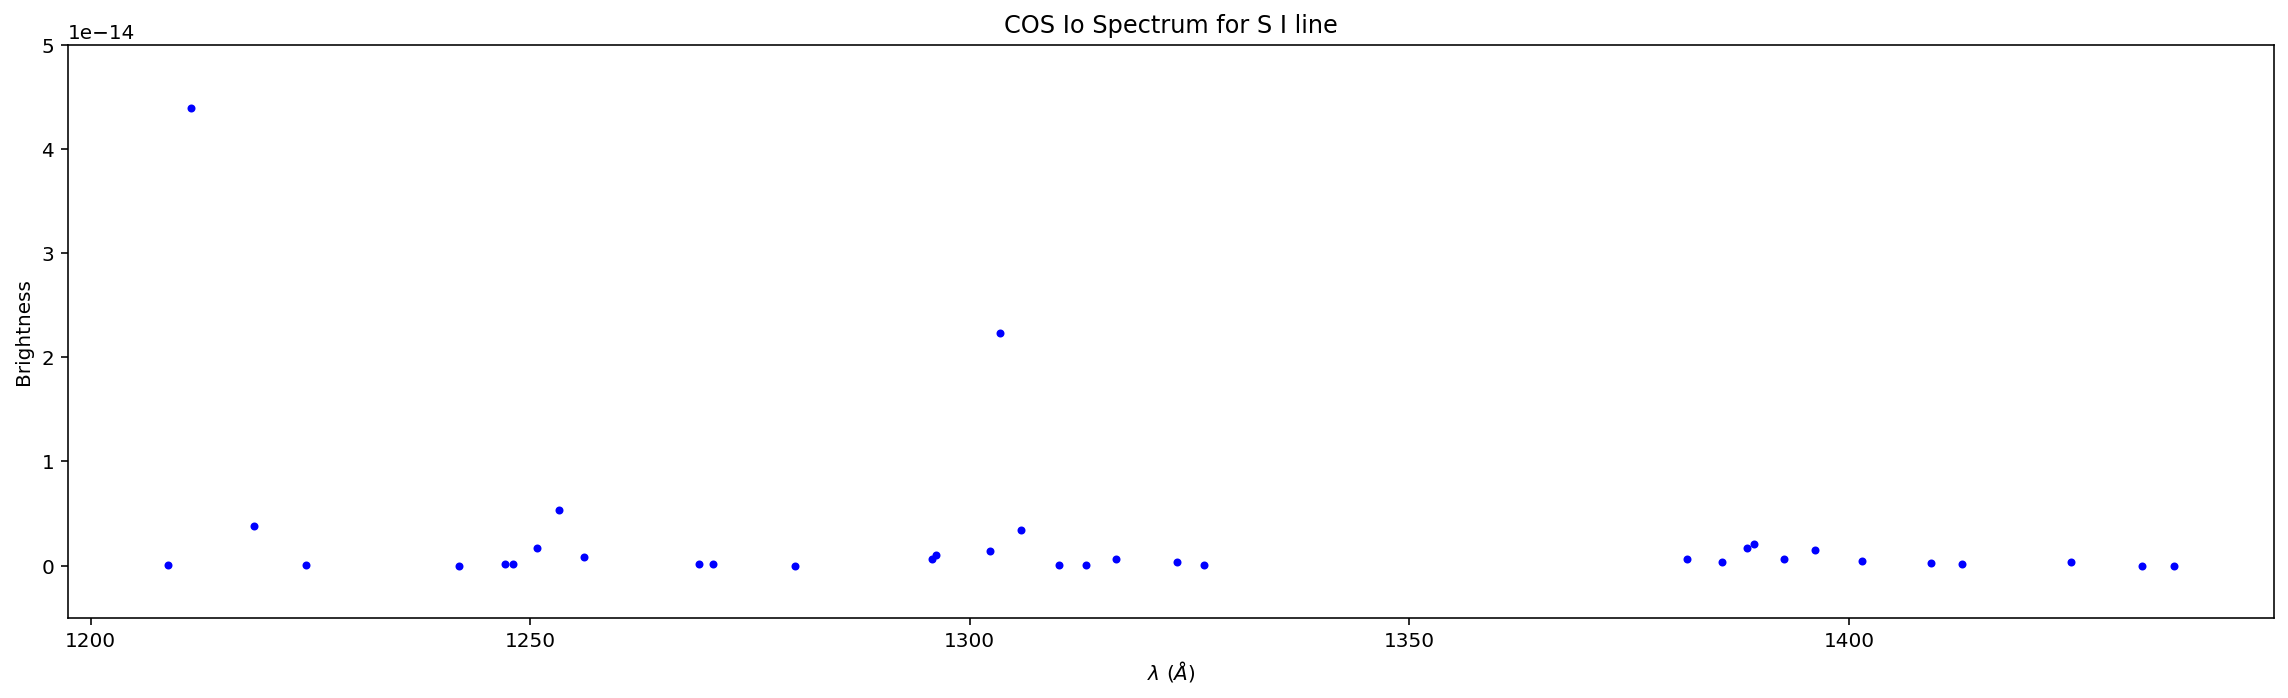

In [15]:
plt.figure(figsize=(16, 5))
plt.plot(df_brightness['int_wv_1'],df_brightness['brightness_1'],'b.')
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Brightness')
plt.title("COS Io Spectrum for S I line")
plt.ylim(-0.05*10**-13,0.5*10**-13)
plt.tight_layout()

In [ ]:
df_sing = df_sing.drop([0,1,2,8,10,14,15,17,18,19,20,23,24,25,27,36,44,45,46])

In [ ]:
plt.figure(figsize=(16, 5))
plt.plot(df_sing['int_wv'],df_sing['brightness'],'b.')
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Brightness')
plt.title("COS Io Spectrum for S I line")
plt.tight_layout()